In [1]:
%pip install pyarrow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade pandas pyarrow

  Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.1
    Not uninstalling pandas at /layers/paketo-buildpacks_poetry-install/poetry-venv/datascience-python-renku-dependencies-xS3fZVNL-py3.13/lib/python3.13/site-packages, outside environment /home/renku/work/.venv
    Can't uninstall 'pandas'. No files were found to uninstall.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path_train_data = "../aventa-av-7-6kw-iet-ost-resear-doi-10.5281-zenodo.16276333/train.parquet"

In [5]:
train_data = pd.read_parquet(path_train_data)

In [6]:
train_data["datetime"] = pd.to_datetime(train_data["datetime"])
train_data = train_data.set_index("datetime")

In [7]:
train_data_10m = train_data.resample("10min").mean()

<Axes: xlabel='datetime'>

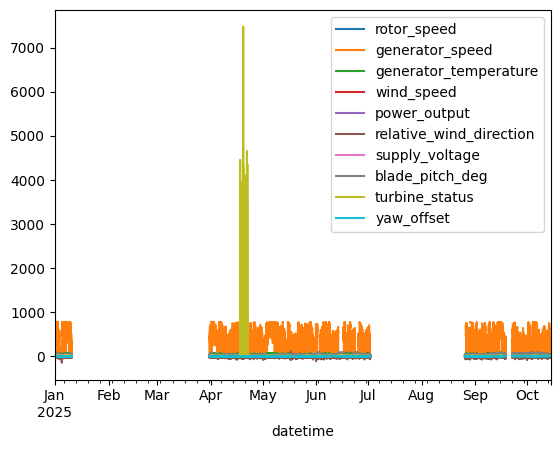

In [8]:
train_data_10m.plot()

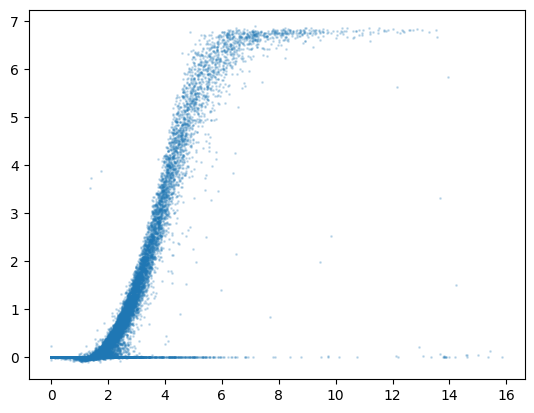

In [9]:
plt.scatter(train_data_10m["wind_speed"],train_data_10m["power_output"],s=1,alpha=0.2)

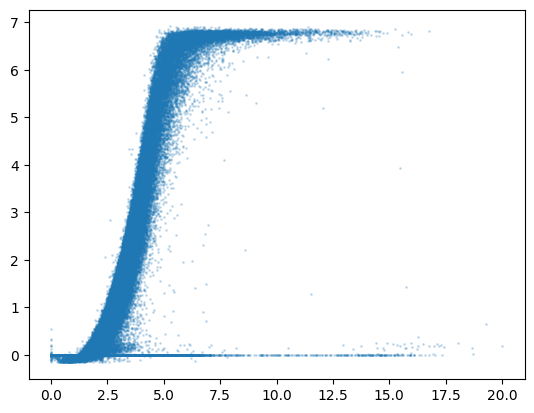

In [10]:
train_data_1m = train_data.resample("1min").mean()
train_data_1m = train_data_1m[train_data_1m["power_output"]<10]
plt.scatter(train_data_1m["wind_speed"],train_data_1m["power_output"],s=1,alpha=0.2)